In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

class Regression:

    def __init__(self, regularization, lr, epoch):
        self.m = None  # samples
        self.n = None  # features
        self.w = None  # weight
        self.b = None  # bias
        self.regularization = regularization  # penalty object
        self.lr = lr  # learning rate
        self.epoch = epoch  # iteration
        
    # Calculate the cost function
    
    def __calculate_cost(self, y, y_pred):
        return (1 / (2 * self.m)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)

    # Hypothesis function for predictions

    def __hypothesis(self, X):
        return np.dot(X, self.w) + self.b  # Include bias term
        
    # Initialize parameters and add bias term to features

    def __initialization(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term to X
        self.m, self.n = X.shape
        self.w = np.zeros((self.n, 1))
        self.b = 0
        return X

    # Update parameters using gradient descent

    def __update_parameters(self, X, y, y_pred):
        dw = (1 / self.m) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
        dw = dw.reshape(self.w.shape)  # Ensure dw has the same shape as self.w (n_features, 1)
        self.w -= self.lr * dw
        self.b -= self.lr * (1 / self.m) * np.sum(y_pred - y)  # Update bias
        return True

    # Fit the regression model to the training data

    def fit(self, X, y):
        X = self.__initialization(X)  # Ensure proper initialization
        y = y.reshape(-1, 1)  # Reshape y to be a column vector
        for e in range(1, self.epoch + 1):
            y_pred = self.__hypothesis(X)
            cost = self.__calculate_cost(y, y_pred)
            self.__update_parameters(X, y, y_pred)
            if e % 100 == 0:
                print(f"The Cost in iteration {e}----->{cost} :)")
                return True

    # Make predictions using the trained model

    def predict(self, X_test):
        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = self.__hypothesis(X_test)
        return y_pred

# Define regularization penalties

class LassoPenalty:

    def __init__(self, l):
        self.l = l  # lambda value

    def __call__(self, w):
        return self.l * np.sum(np.abs(w))

    def derivation(self, w):
        return self.l * np.sign(w)


class RidgePenalty:

    def __init__(self, l):
        self.l = l

    def __call__(self, w):
        return self.l * np.sum(np.square(w))

    def derivation(self, w):
        return self.l * 2 * w


class ElasticPenalty:

    def __init__(self, l=0.1, l_ratio=0.5):
        self.l = l
        self.l_ratio = l_ratio

    def __call__(self, w):
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(w))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(w))
        return l1_contribution + l2_contribution

    def derivation(self, w):
        l1_derivation = self.l * self.l_ratio * np.sign(w)
        l2_derivation = self.l * (1 - self.l_ratio) * w
        return l1_derivation + l2_derivation

# Define specific regression models using the base Regression class and regularization penalties

class Lasso(Regression):

    def __init__(self, l, lr, epoch):
        regularization = LassoPenalty(l)
        super().__init__(regularization, lr, epoch)  # Call superclass constructor


class Ridge(Regression):

    def __init__(self, l, lr, epoch):
        regularization = RidgePenalty(l)
        super().__init__(regularization, lr, epoch)  # Call superclass constructor


class ElasticNet(Regression):

    def __init__(self, l, l_ratio, lr, epoch):
        regularization = ElasticPenalty(l, l_ratio)
        super().__init__(regularization, lr, epoch)  # Call superclass constructor

In [35]:
# Generate some sample data
X, y = make_regression(n_samples=100, n_features=5, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Train Lasso, Ridge, and ElasticNet models
lasso_model = Lasso(l=0.1, lr=0.01, epoch=1000)
ridge_model = Ridge(l=0.1, lr=0.01, epoch=1000)
elastic_net_model = ElasticNet(l=0.1, l_ratio=0.7, lr=0.01, epoch=1000)

lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

The Cost in iteration 100----->1604.8044562795253 :)
The Cost in iteration 100----->2648.393711903409 :)
The Cost in iteration 100----->1771.698989712946 :)


True

In [37]:
# Predict on training set
lasso_train_pred = lasso_model.predict(X_train)
ridge_train_pred = ridge_model.predict(X_train)
elastic_net_train_pred = elastic_net_model.predict(X_train)

In [38]:
# Evaluate training set performance (R-squared)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
elastic_net_train_r2 = r2_score(y_train, elastic_net_train_pred)

In [39]:
# Predict on test set
lasso_test_pred = lasso_model.predict(X_test)
ridge_test_pred = ridge_model.predict(X_test)
elastic_net_test_pred = elastic_net_model.predict(X_test)

In [40]:
# Evaluate test set performance (R-squared)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
elastic_net_test_r2 = r2_score(y_test, elastic_net_test_pred)

In [41]:
# Print out results
print("Lasso Regression-Training set score:", lasso_train_r2)
print("Lasso Regression-Test set score:", lasso_test_r2)

Lasso Regression-Training set score: 0.8503102897982756
Lasso Regression-Test set score: 0.8046140565536746


In [42]:
print("Ridge Regression-Training set score:", ridge_train_r2)
print("Ridge Regression-Test set score:", ridge_test_r2)

Ridge Regression-Training set score: 0.8136670345065171
Ridge Regression-Test set score: 0.7646734487787789


In [43]:
print("ElasticNet Regression-Training set score:", elastic_net_train_r2)
print("ElasticNet Regression-Test set score:", elastic_net_test_r2)

ElasticNet Regression-Training set score: 0.8449453317155123
ElasticNet Regression-Test set score: 0.7987392863207359


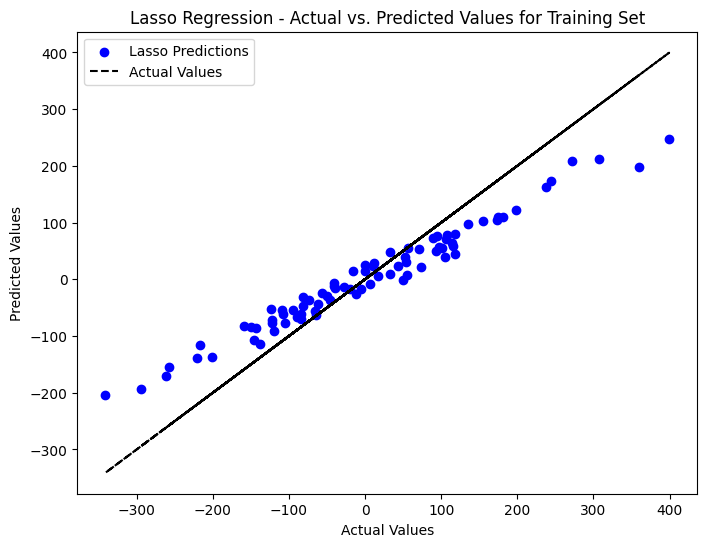

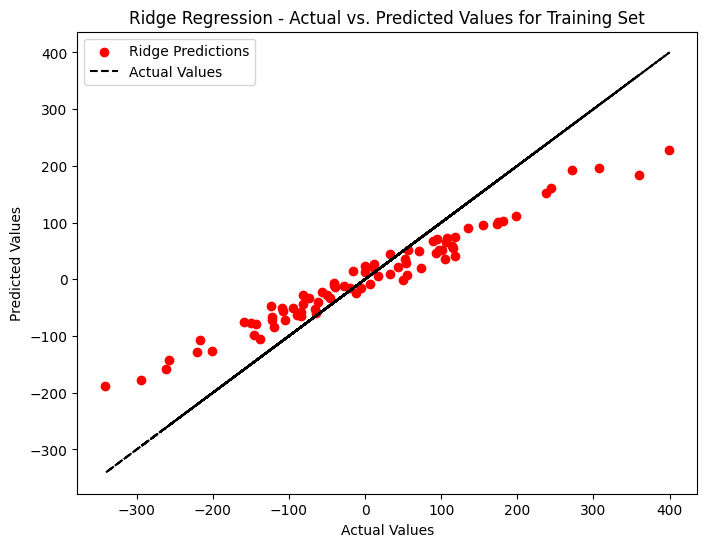

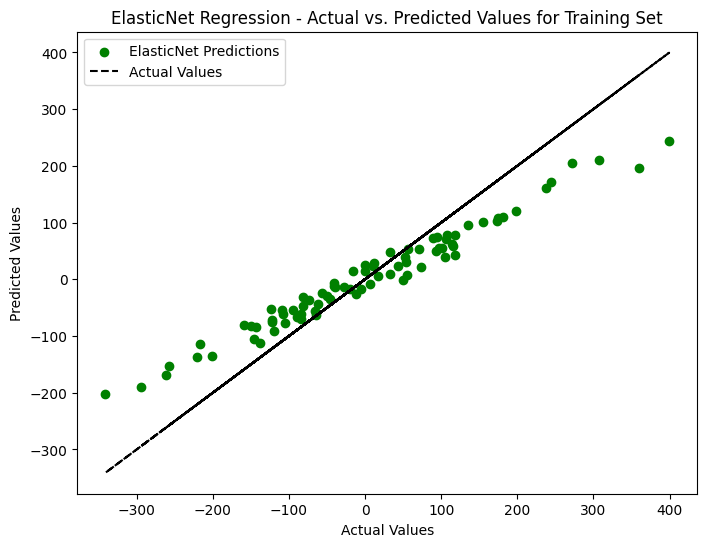

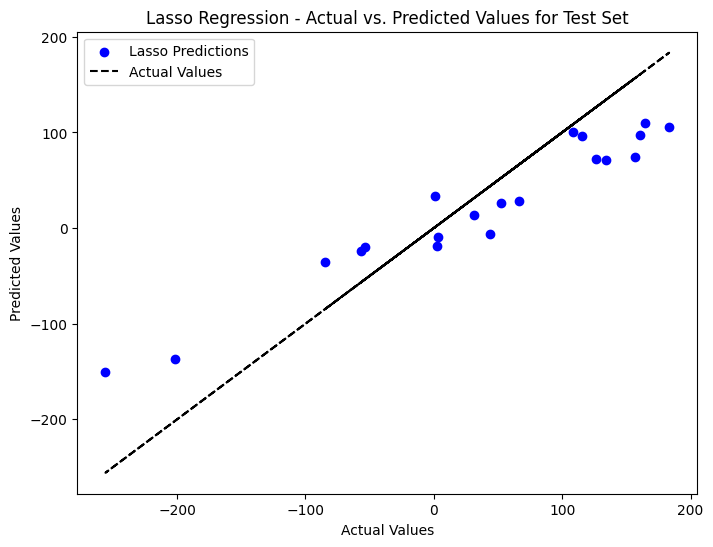

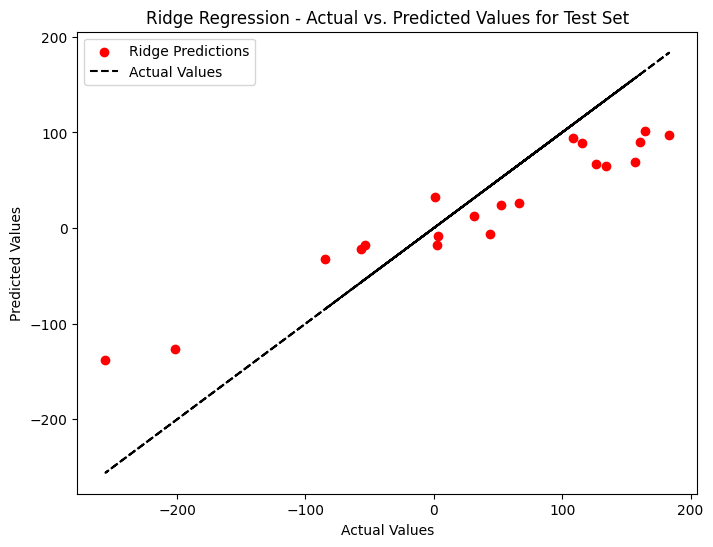

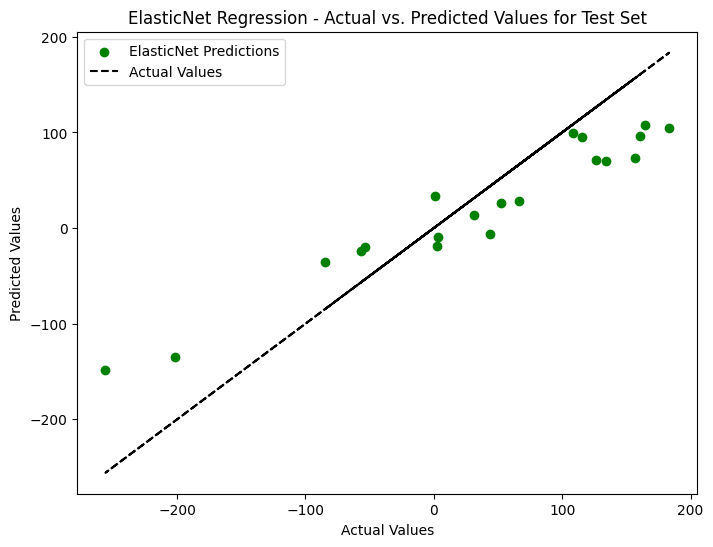

In [44]:
# Plot actual vs. predicted values for training set - Lasso Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_train, lasso_train_pred, color='blue', label='Lasso Predictions')
plt.plot(y_train, y_train, color='black', linestyle='--', label='Actual Values')
plt.title('Lasso Regression - Actual vs. Predicted Values for Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot actual vs. predicted values for training set - Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_train, ridge_train_pred, color='red', label='Ridge Predictions')
plt.plot(y_train, y_train, color='black', linestyle='--', label='Actual Values')
plt.title('Ridge Regression - Actual vs. Predicted Values for Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot actual vs. predicted values for training set - ElasticNet Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_train, elastic_net_train_pred, color='green', label='ElasticNet Predictions')
plt.plot(y_train, y_train, color='black', linestyle='--', label='Actual Values')
plt.title('ElasticNet Regression - Actual vs. Predicted Values for Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set - Lasso Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_test_pred, color='blue', label='Lasso Predictions')
plt.plot(y_test, y_test, color='black', linestyle='--', label='Actual Values')
plt.title('Lasso Regression - Actual vs. Predicted Values for Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set - Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_test_pred, color='red', label='Ridge Predictions')
plt.plot(y_test, y_test, color='black', linestyle='--', label='Actual Values')
plt.title('Ridge Regression - Actual vs. Predicted Values for Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set - ElasticNet Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, elastic_net_test_pred, color='green', label='ElasticNet Predictions')
plt.plot(y_test, y_test, color='black', linestyle='--', label='Actual Values')
plt.title('ElasticNet Regression - Actual vs. Predicted Values for Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


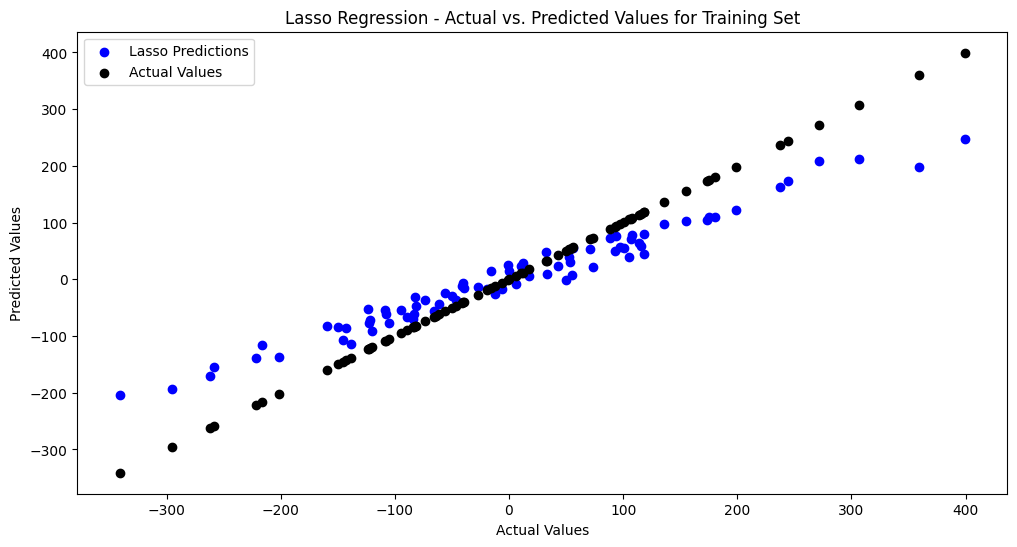

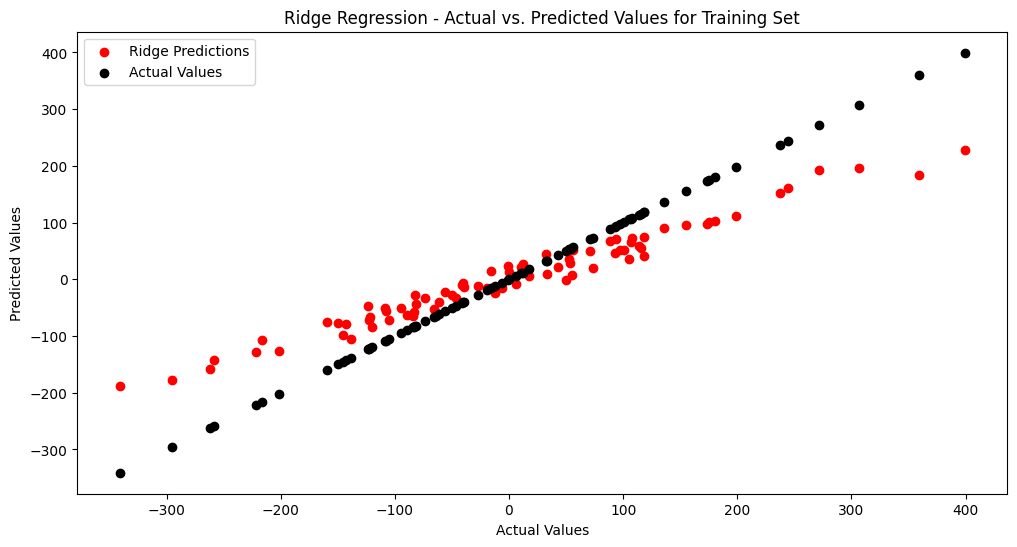

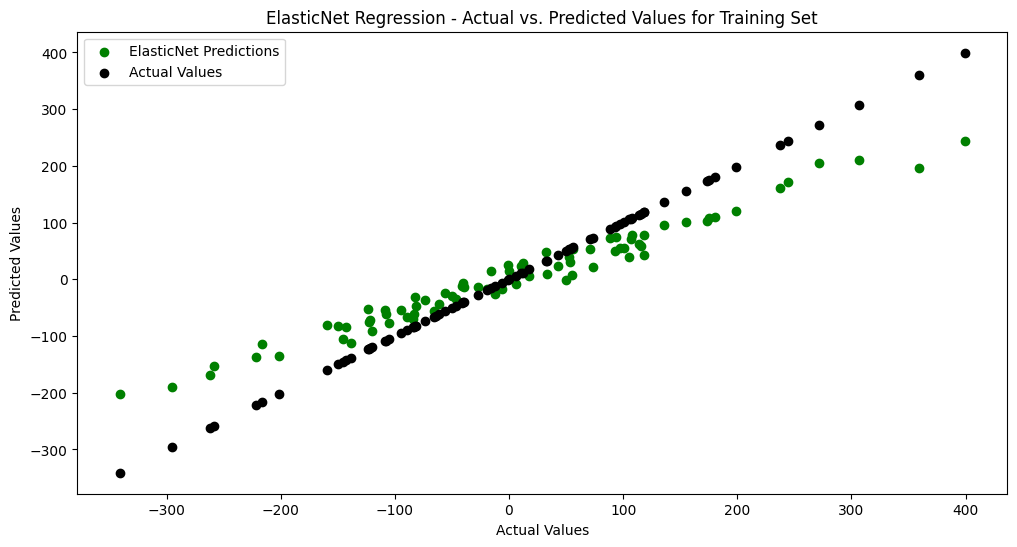

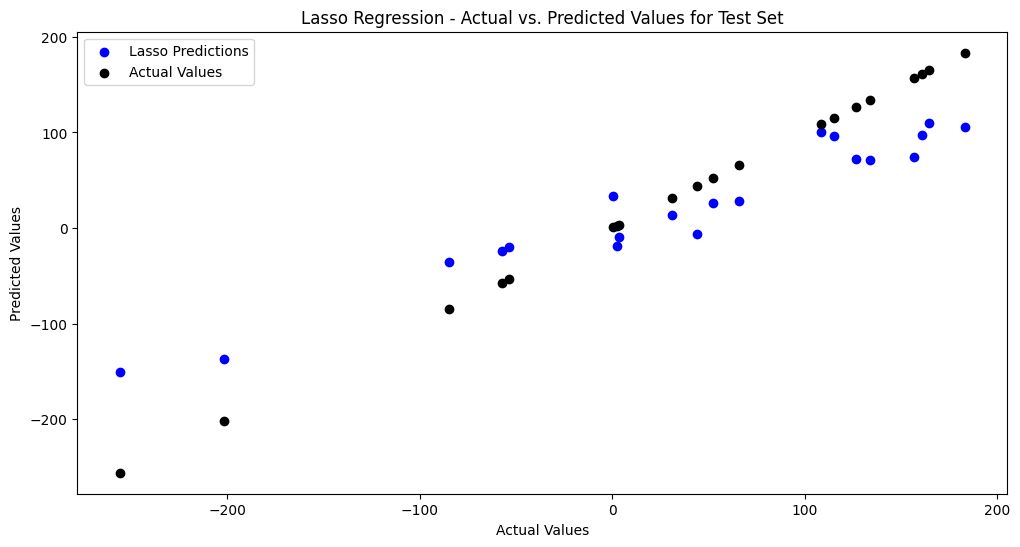

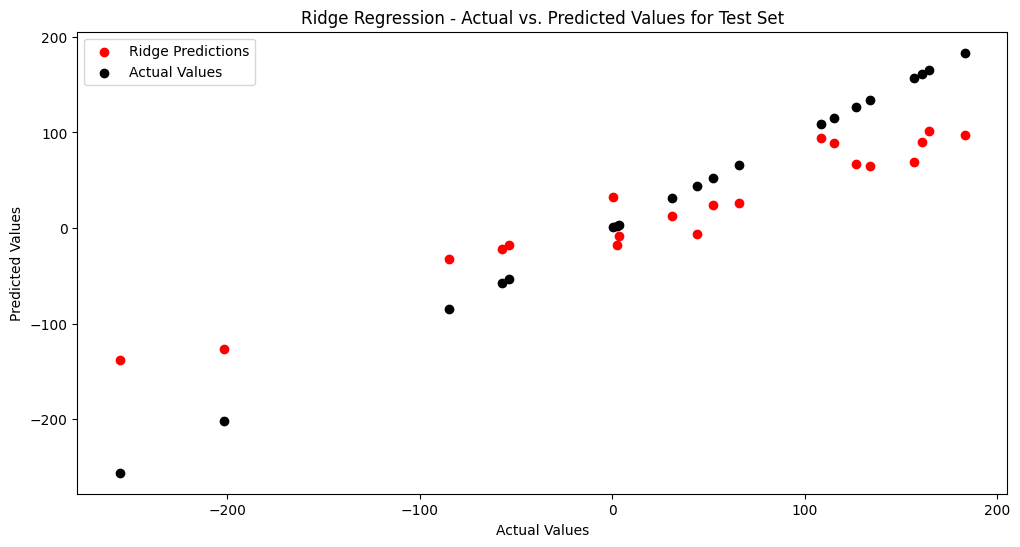

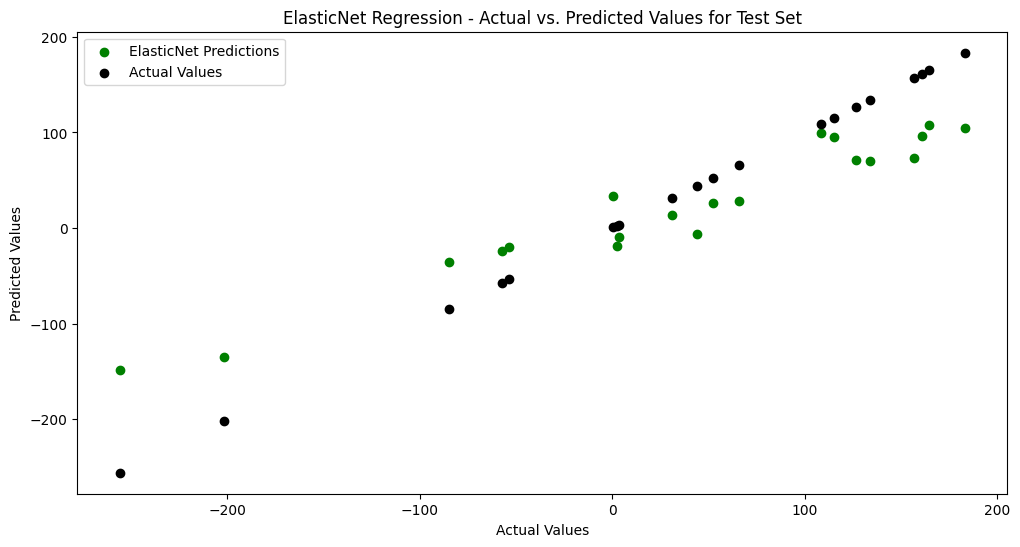

In [45]:

# Plot actual vs. predicted values for training set
plt.figure(figsize=(12, 6))
plt.scatter(y_train, lasso_train_pred, color='blue', label='Lasso Predictions')
plt.scatter(y_train, y_train, color='black', label='Actual Values')
plt.title('Lasso Regression - Actual vs. Predicted Values for Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_train, ridge_train_pred, color='red', label='Ridge Predictions')
plt.scatter(y_train, y_train, color='black', label='Actual Values')
plt.title('Ridge Regression - Actual vs. Predicted Values for Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_train, elastic_net_train_pred, color='green', label='ElasticNet Predictions')
plt.scatter(y_train, y_train, color='black', label='Actual Values')
plt.title('ElasticNet Regression - Actual vs. Predicted Values for Training Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Plot actual vs. predicted values for test set
plt.figure(figsize=(12, 6))
plt.scatter(y_test, lasso_test_pred, color='blue', label='Lasso Predictions')
plt.scatter(y_test, y_test, color='black', label='Actual Values')
plt.title('Lasso Regression - Actual vs. Predicted Values for Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test, ridge_test_pred, color='red', label='Ridge Predictions')
plt.scatter(y_test, y_test, color='black', label='Actual Values')
plt.title('Ridge Regression - Actual vs. Predicted Values for Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test, elastic_net_test_pred, color='green', label='ElasticNet Predictions')
plt.scatter(y_test, y_test, color='black', label='Actual Values')
plt.title('ElasticNet Regression - Actual vs. Predicted Values for Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
